In [1255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
%matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [1256]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [1257]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
2878,21.06
2879,20.51
2880,20.04
2881,19.36


<Axes: >

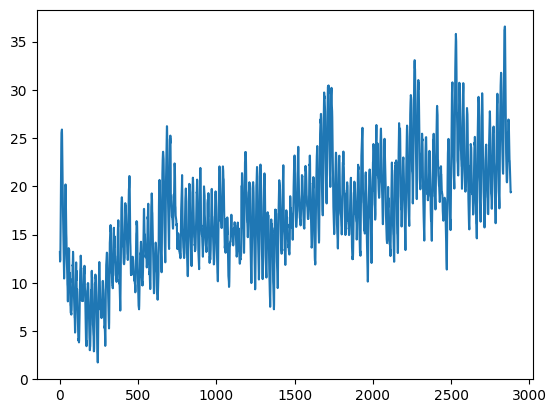

In [1258]:
data['temp'].plot()

In [1259]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 4, 16, 7, 0)

In [1260]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2024, 8, 14, 10, 0))

In [1261]:
len(data)

2883

In [1262]:
date_time_str

'16/04/24 07:00:00'

In [1263]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [1264]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19829.29166667, 19829.33333333, 19829.375     , ...,
       19949.29166667, 19949.33333333, 19949.375     ])

In [1265]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [1266]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [1267]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
2878,14/08/24 05:00:00,21.06
2879,14/08/24 06:00:00,20.51
2880,14/08/24 07:00:00,20.04
2881,14/08/24 08:00:00,19.36


In [1268]:
import warnings
warnings.filterwarnings("ignore")


In [1269]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19829.291667  16/04/24 07:00:00
 1     12.20  19829.333333  16/04/24 08:00:00
 2     12.29  19829.375000  16/04/24 09:00:00
 3     12.42  19829.416667  16/04/24 10:00:00
 4     14.54  19829.458333  16/04/24 11:00:00
 ...     ...           ...                ...
 2878  21.06  19949.208333  14/08/24 05:00:00
 2879  20.51  19949.250000  14/08/24 06:00:00
 2880  20.04  19949.291667  14/08/24 07:00:00
 2881  19.36  19949.333333  14/08/24 08:00:00
 2882  19.39  19949.375000  14/08/24 09:00:00
 
 [2883 rows x 3 columns],
 2883)

In [1270]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [1271]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

19.400000000000016

In [1272]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

2859

In [1273]:
len(x)

2859

In [1274]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

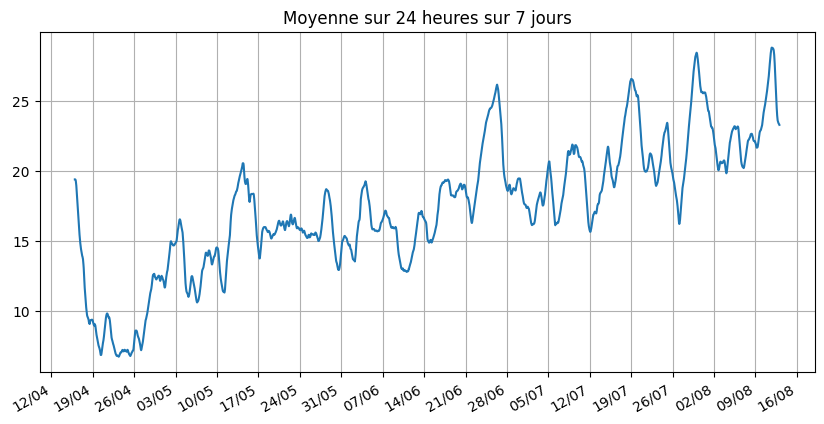

In [1275]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [1276]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=120, seconds=5246, microseconds=538069)

In [1277]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [1278]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2024, 8, 14, 8, 27, 26, 538069),
 120)

In [1279]:
moyenne = data['temp'].mean()
moyenne

17.385161290322603

17.385161290322603

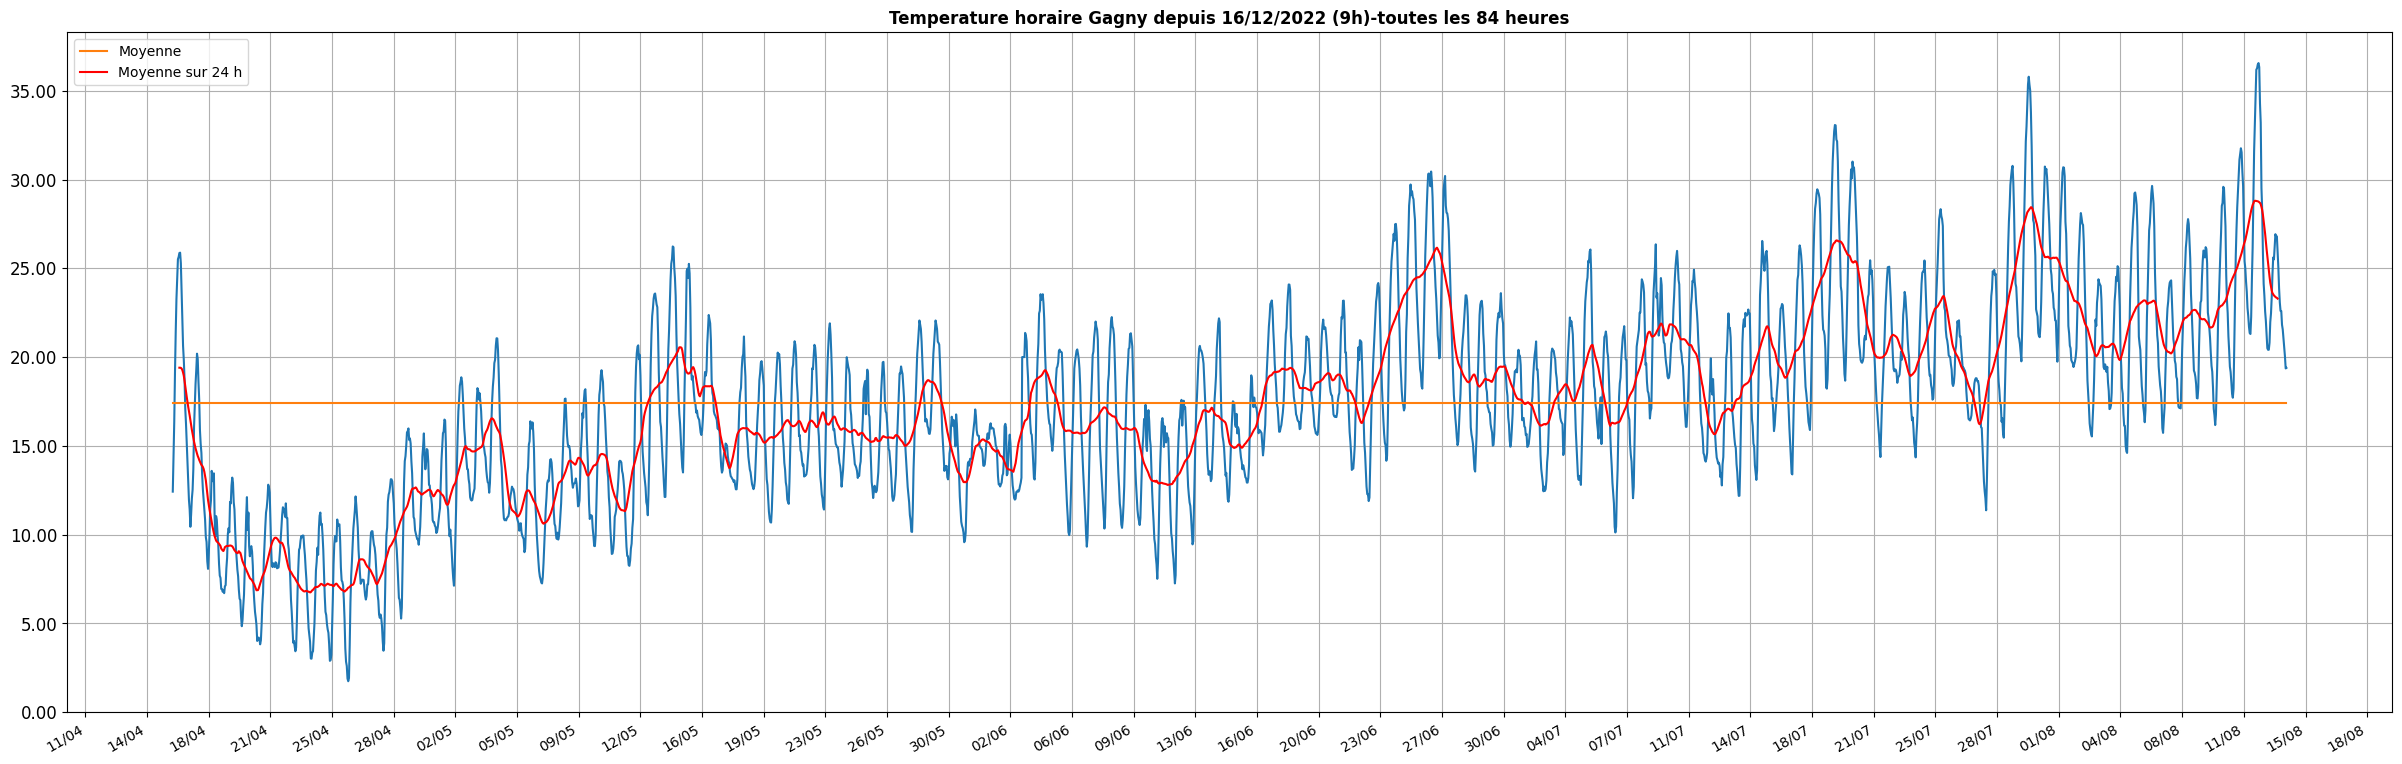

In [1280]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [1281]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
2878,21.06,19949.208333,14/08/24 05:00:00,-0.49
2879,20.51,19949.250000,14/08/24 06:00:00,-0.55
2880,20.04,19949.291667,14/08/24 07:00:00,-0.47
2881,19.36,19949.333333,14/08/24 08:00:00,-0.68


<Axes: >

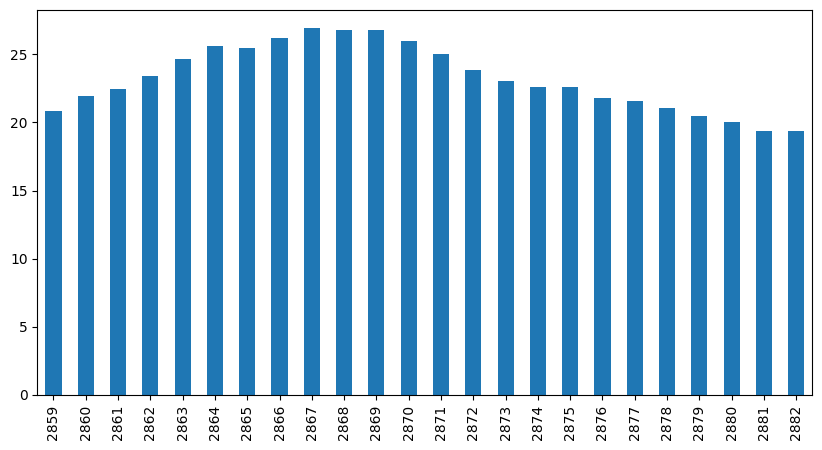

In [1282]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

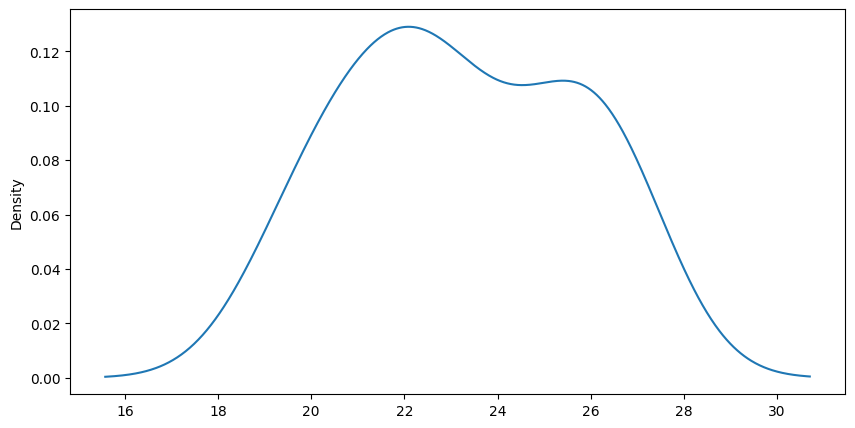

In [1283]:
try:
    data.tail(24)['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

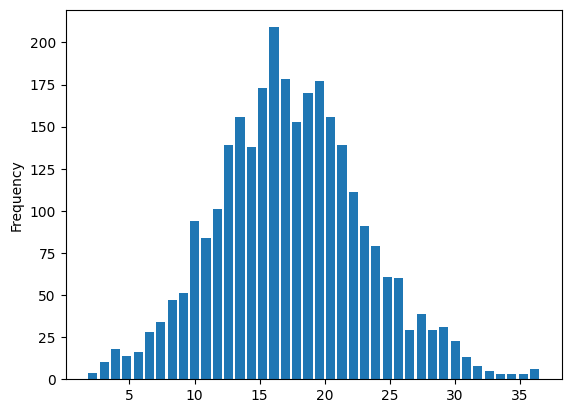

In [1284]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

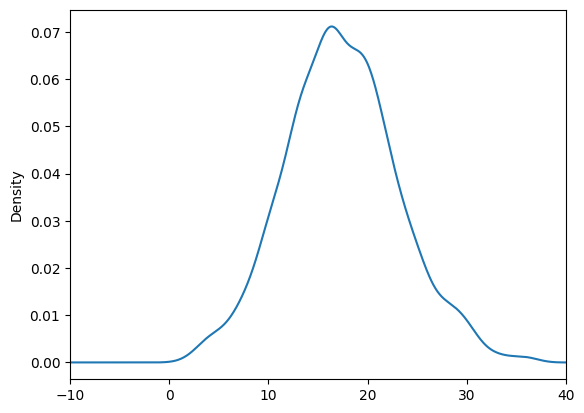

In [1285]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

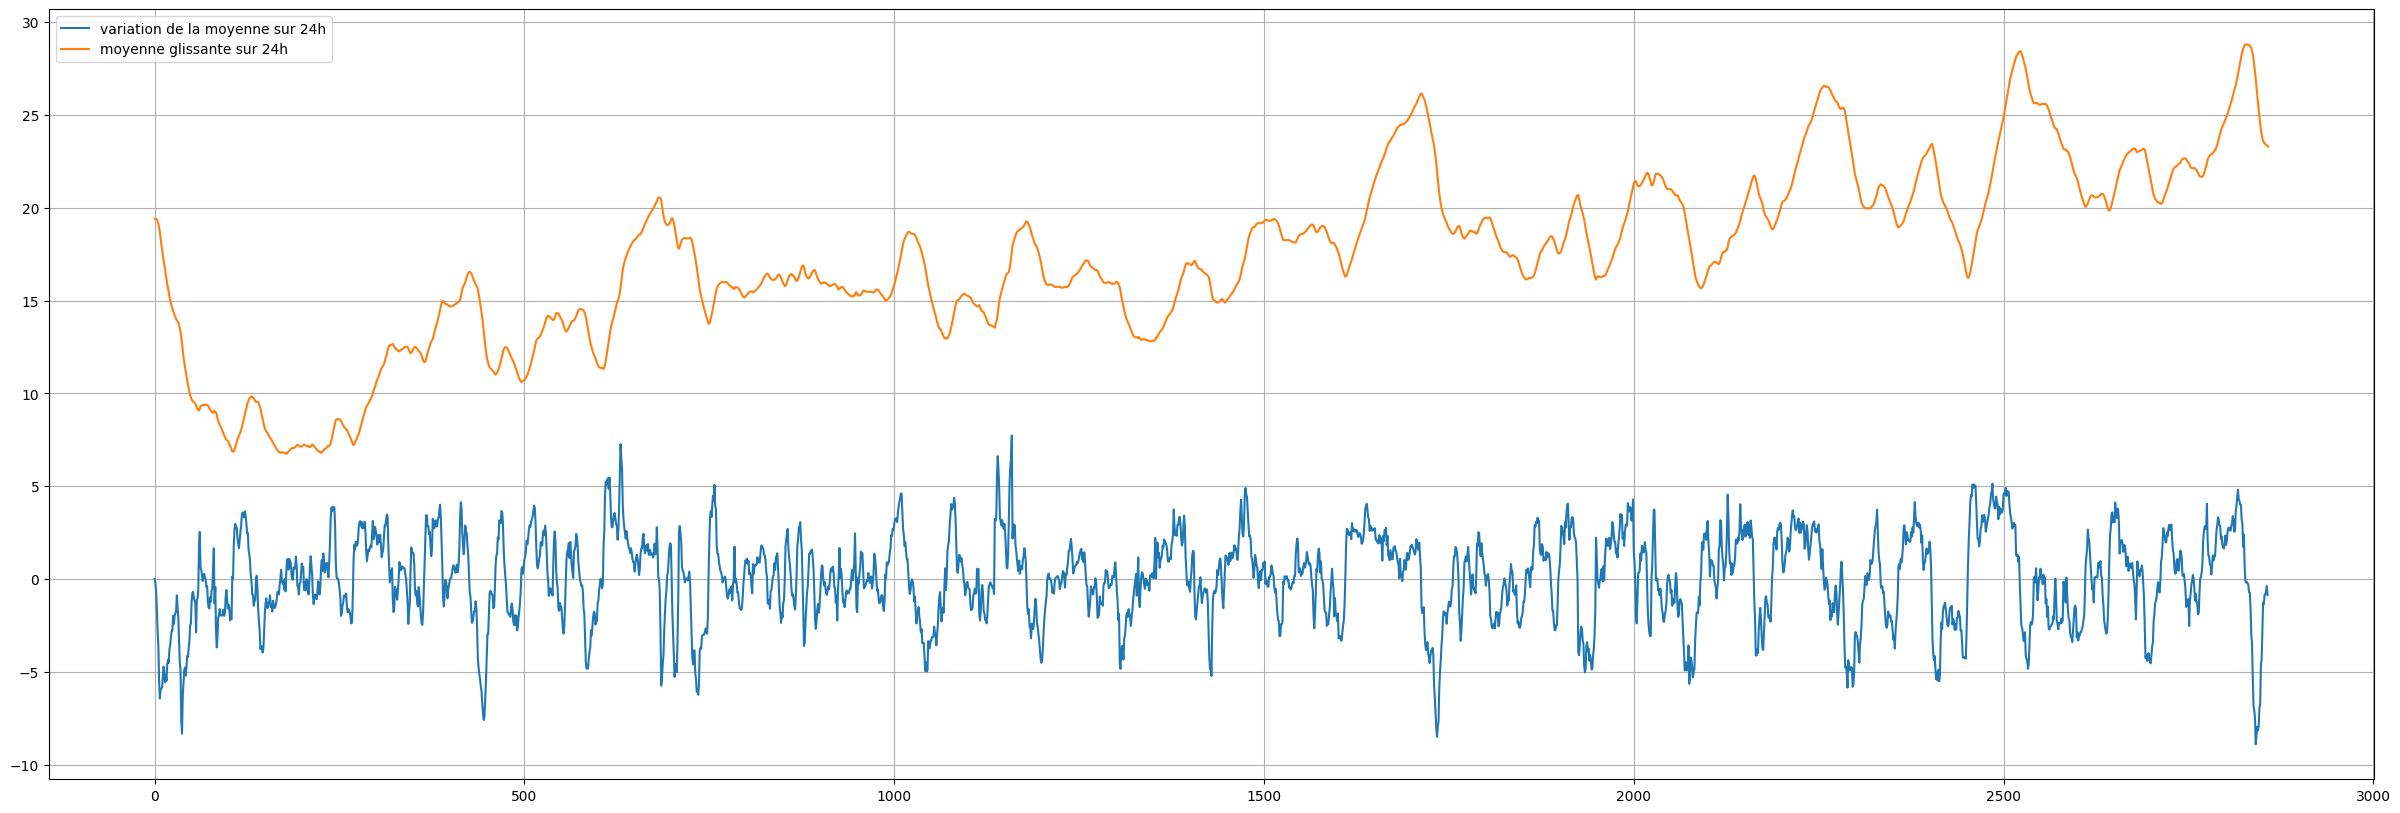

In [1286]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [1287]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [1288]:
window, days, interval

(24, 15, 12)

In [1289]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [1290]:
h

2523    19934.416667
2524    19934.458333
2525    19934.500000
2526    19934.541667
2527    19934.583333
            ...     
2878    19949.208333
2879    19949.250000
2880    19949.291667
2881    19949.333333
2882    19949.375000
Name: hours, Length: 360, dtype: float64

In [1291]:
 datetime.now()

datetime.datetime(2024, 8, 14, 8, 27, 32, 743475)

In [1292]:
window_start

'30/07/2024, 08:27:32'

In [1293]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

23.5040277777778

In [1294]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 23.5040277777778)

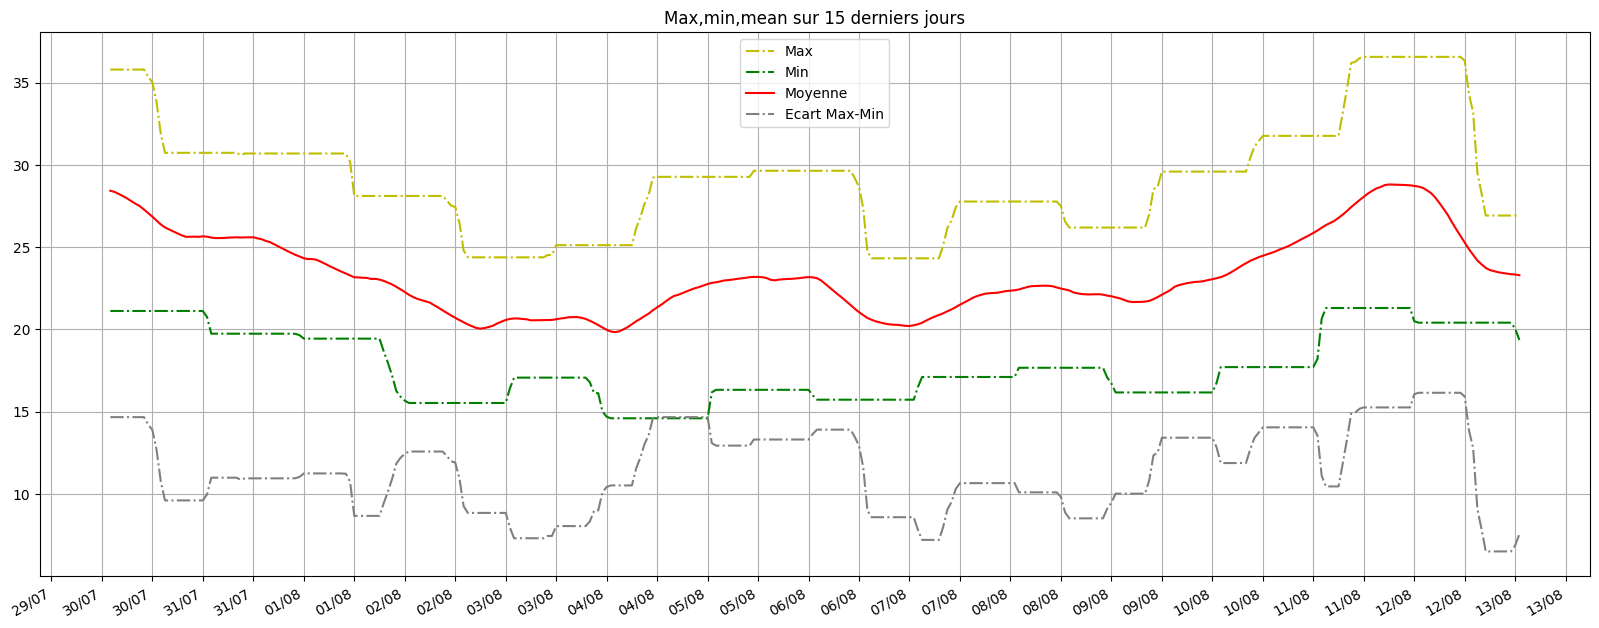

In [1295]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [1296]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

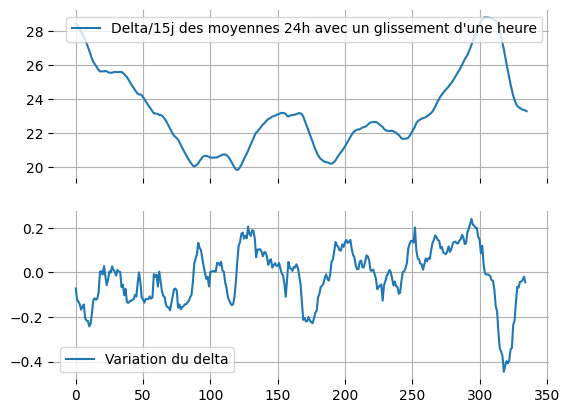

In [1297]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [1298]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [1299]:
# graphical output...
from pylab import sign, diff


In [1300]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


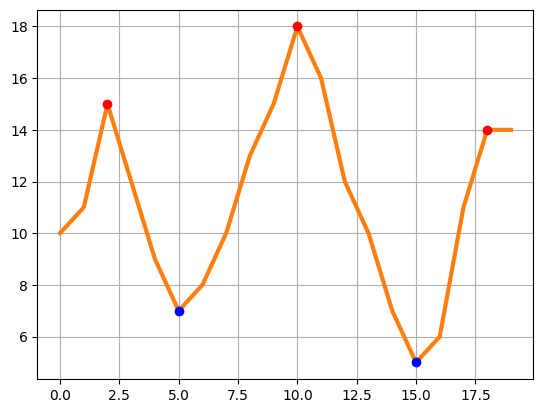

In [1301]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [1302]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
2715,07/08/24,10,16.50,0.77
2716,07/08/24,11,17.15,0.65
2717,07/08/24,12,18.84,1.69
2718,07/08/24,13,20.22,1.38
2719,07/08/24,14,21.91,1.69
...,...,...,...,...
2878,14/08/24,05,21.06,-0.49
2879,14/08/24,06,20.51,-0.55
2880,14/08/24,07,20.04,-0.47
2881,14/08/24,08,19.36,-0.68


In [1303]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [1304]:
_max - _min

20.39

## Main graph

(23.5040277777778, 15)

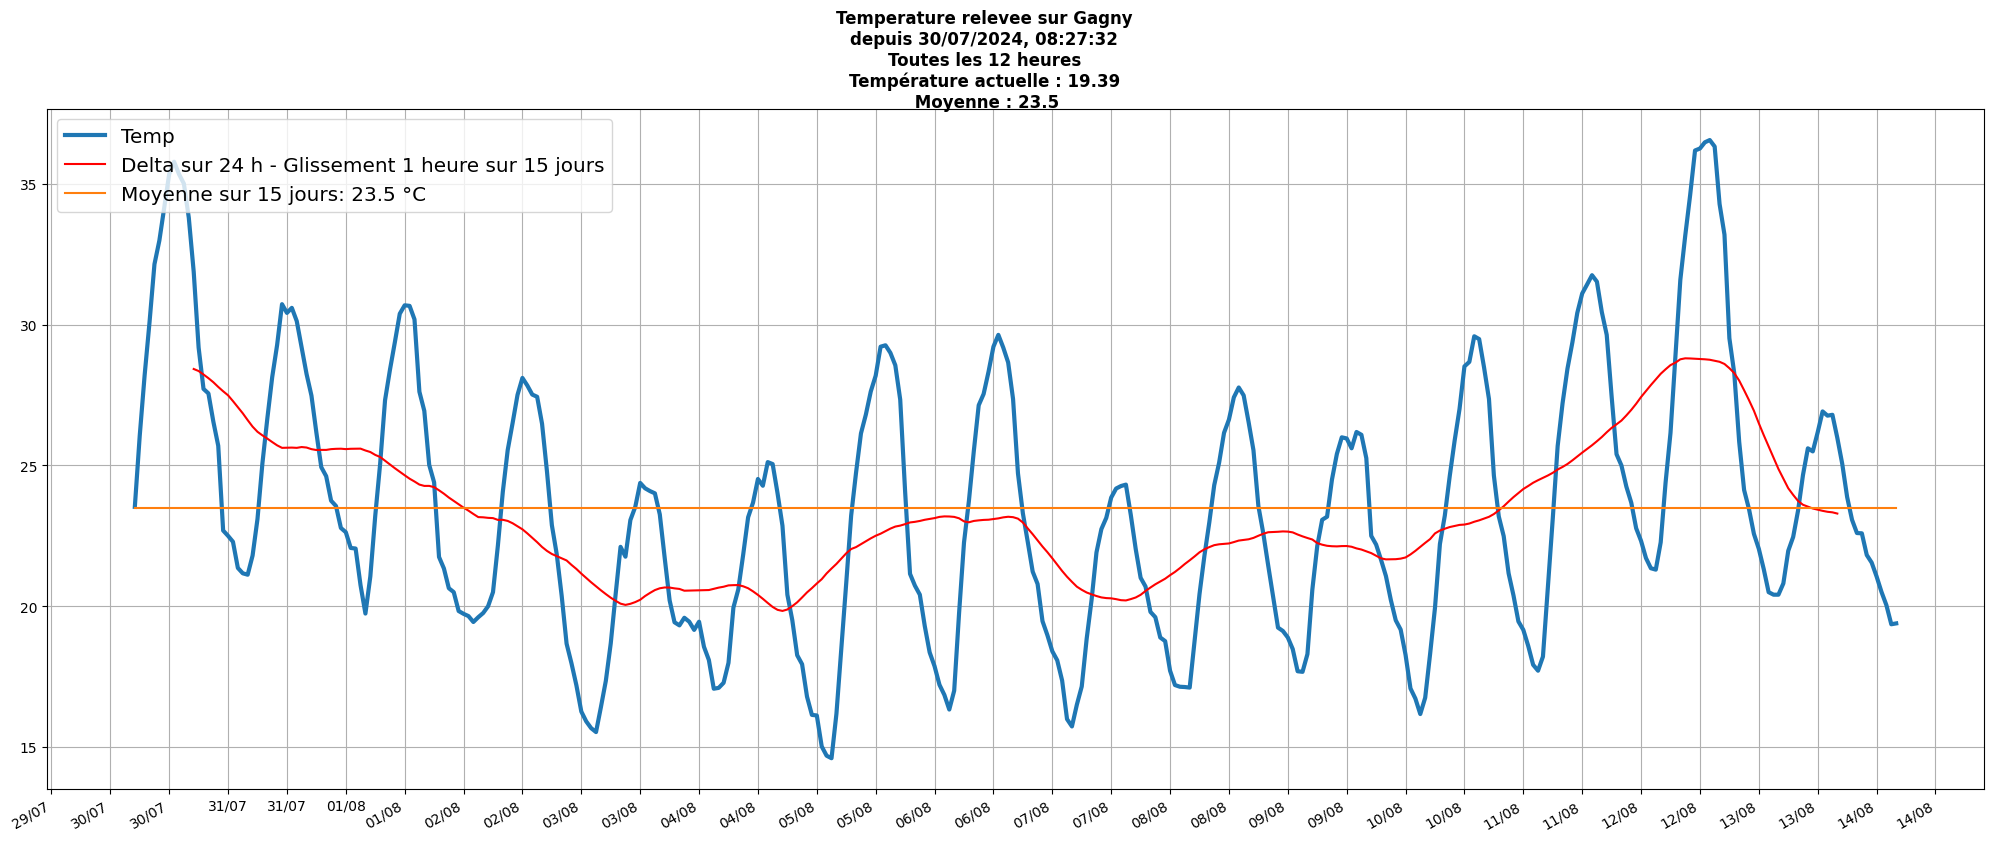

In [1305]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [1306]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
2878,05,21.06,-0.49
2879,06,20.51,-0.55
2880,07,20.04,-0.47
2881,08,19.36,-0.68
2882,09,19.39,0.03


In [1307]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

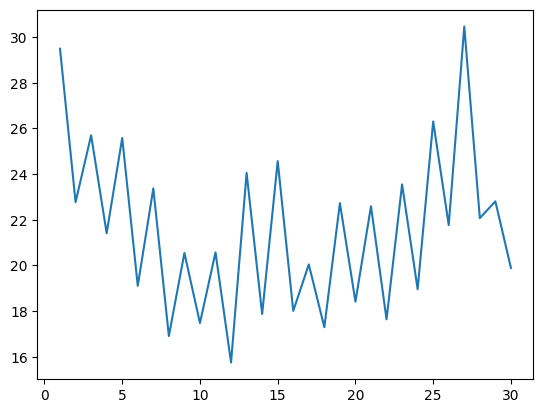

In [1308]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

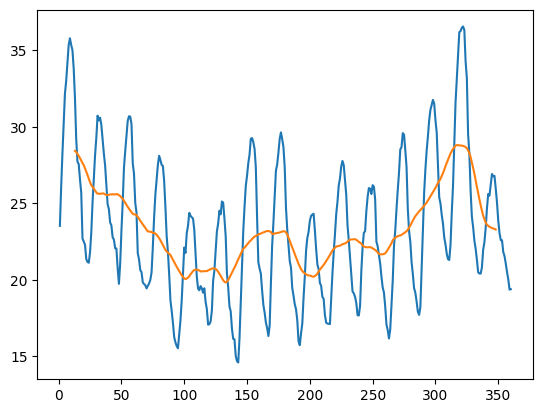

In [1309]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x287b6315b50>])

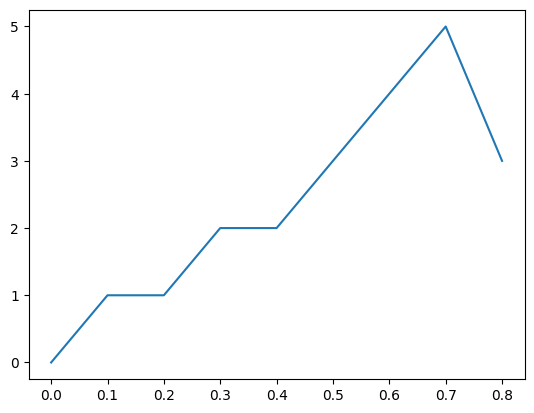

In [1310]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x287b601a570>])

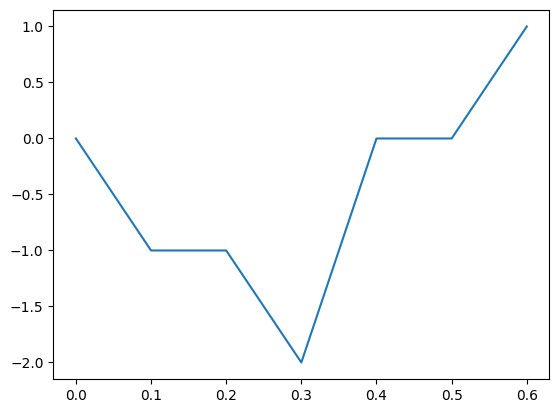

In [1311]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

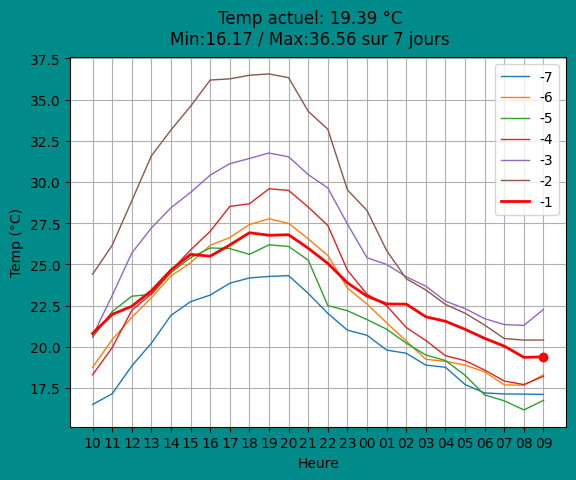

In [1312]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"Temp actuel: {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel("Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()

In [1313]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [1314]:
max_,min_

(26.920000000000016, 19.360000000000014)

In [1315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       2883 non-null   float64
 1   hours      2883 non-null   float64
 2   dates      2883 non-null   object 
 3   variation  2882 non-null   float64
 4   heures     2883 non-null   object 
 5   jours      2883 non-null   object 
dtypes: float64(3), object(3)
memory usage: 135.3+ KB


In [1316]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
2878,21.06,19949.208333,14/08/24 05:00:00,-0.49,05,14/08/24
2879,20.51,19949.250000,14/08/24 06:00:00,-0.55,06,14/08/24
2880,20.04,19949.291667,14/08/24 07:00:00,-0.47,07,14/08/24
2881,19.36,19949.333333,14/08/24 08:00:00,-0.68,08,14/08/24


In [1317]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


In [1318]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [1319]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

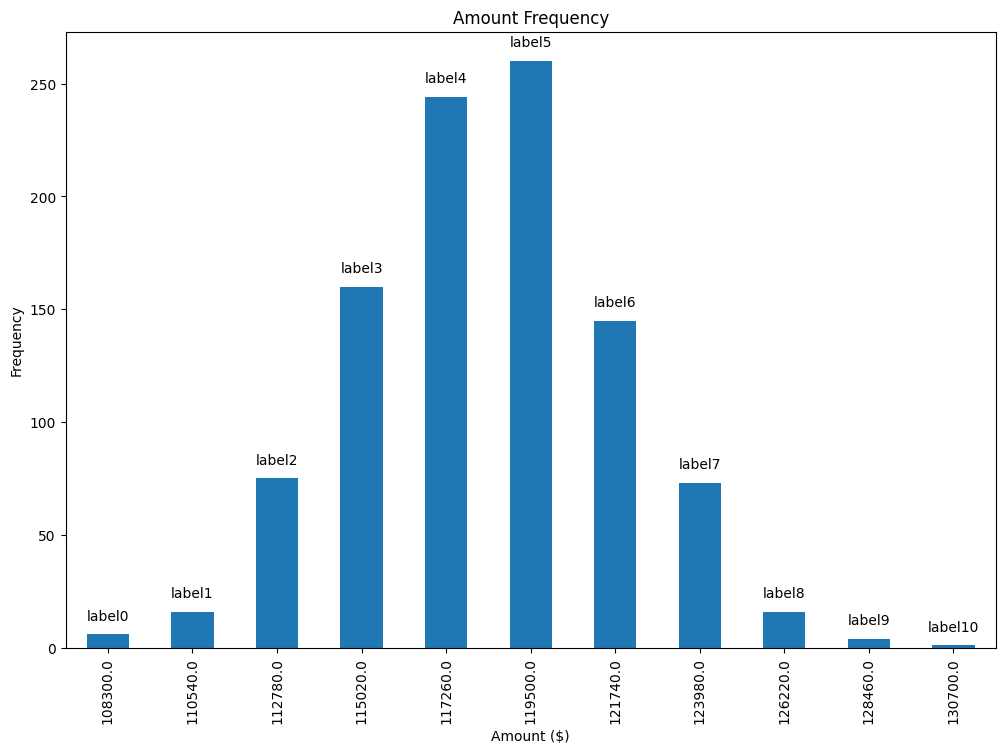

In [1320]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [1321]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [20.13, 22.21, 21.74, 22.92, 25.86, 28.35, 23.14])

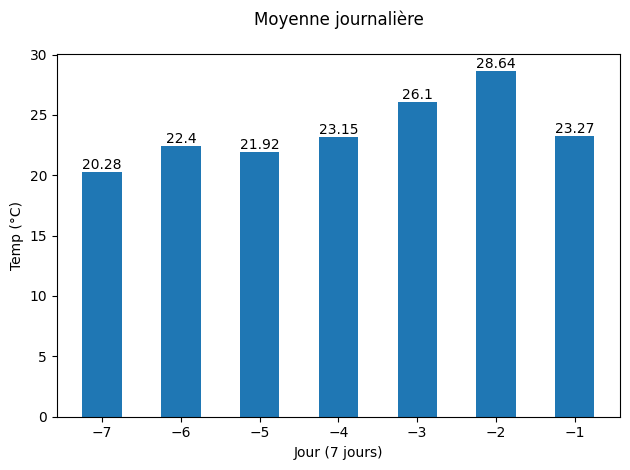

In [1322]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )



In [1323]:
labels

[20.28, 22.4, 21.92, 23.15, 26.1, 28.64, 23.27]

In [1324]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([20.81,
  21.970000000000027,
  22.46000000000004,
  23.40000000000004,
  24.660000000000025,
  25.610000000000014,
  25.5,
  26.180000000000007,
  26.920000000000016,
  26.77000000000004,
  26.80000000000001,
  25.98000000000001,
  25.06,
  23.879999999999995,
  23.07000000000005,
  22.600000000000023,
  22.590000000000032,
  21.82000000000005,
  21.55000000000001,
  21.06,
  20.510000000000048,
  20.04000000000002,
  19.360000000000014,
  19.390000000000043],
 537.8900000000006)

In [1325]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

537.8900000000006

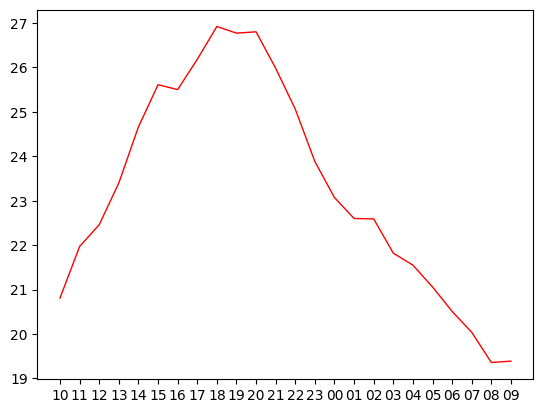

In [1326]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [1327]:
data.tail()


,temp,hours,dates,variation,heures,jours
2878,21.06,19949.208333,14/08/24 05:00:00,-0.49,05,14/08/24
2879,20.51,19949.250000,14/08/24 06:00:00,-0.55,06,14/08/24
2880,20.04,19949.291667,14/08/24 07:00:00,-0.47,07,14/08/24
2881,19.36,19949.333333,14/08/24 08:00:00,-0.68,08,14/08/24
2882,19.39,19949.375000,14/08/24 09:00:00,0.03,09,14/08/24


In [1328]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([25.610000000000014, 26.920000000000016, 26.80000000000001],
 [20.81, 25.5, 26.77000000000004, 19.360000000000014],
 3,
 4)

In [1329]:
_diff=[M-m for M,m in zip(_max, _min)]

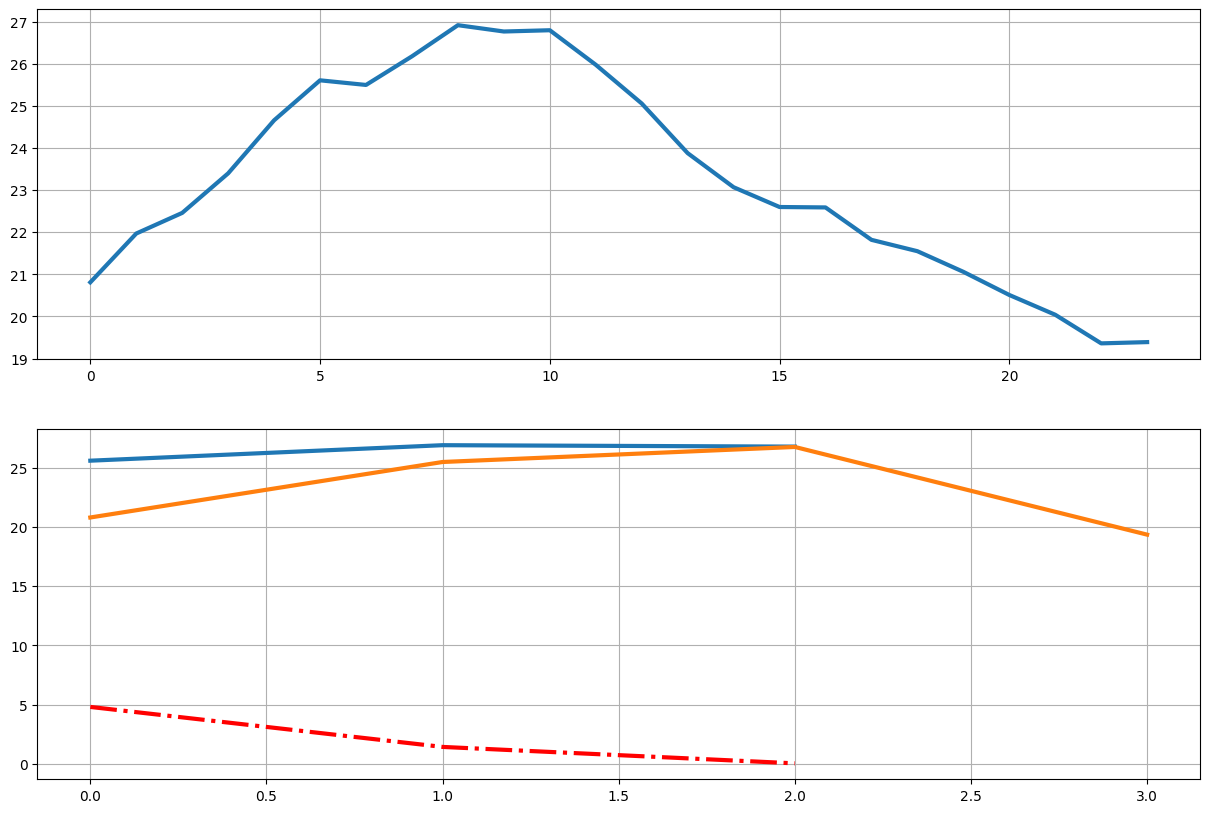

In [1330]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [1] 1
[] 0 [2] 1


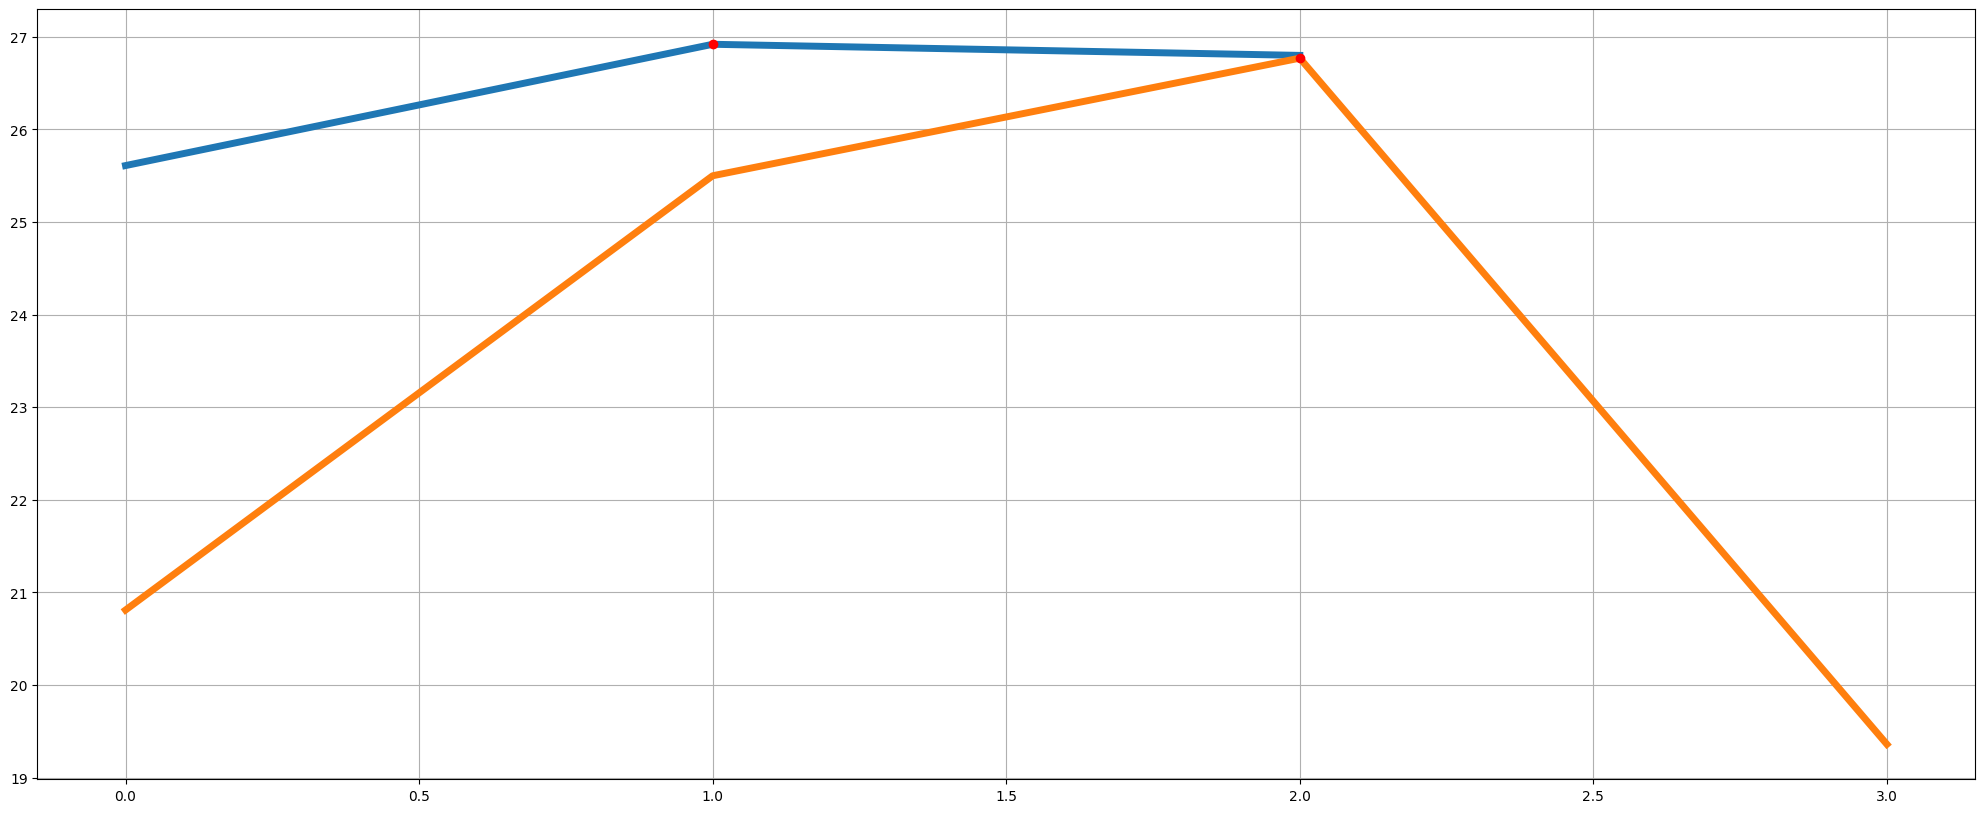

In [1331]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [1332]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [1333]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [1334]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [1335]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [1336]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

[ 5 15] 2 [ 2 10 18] 3


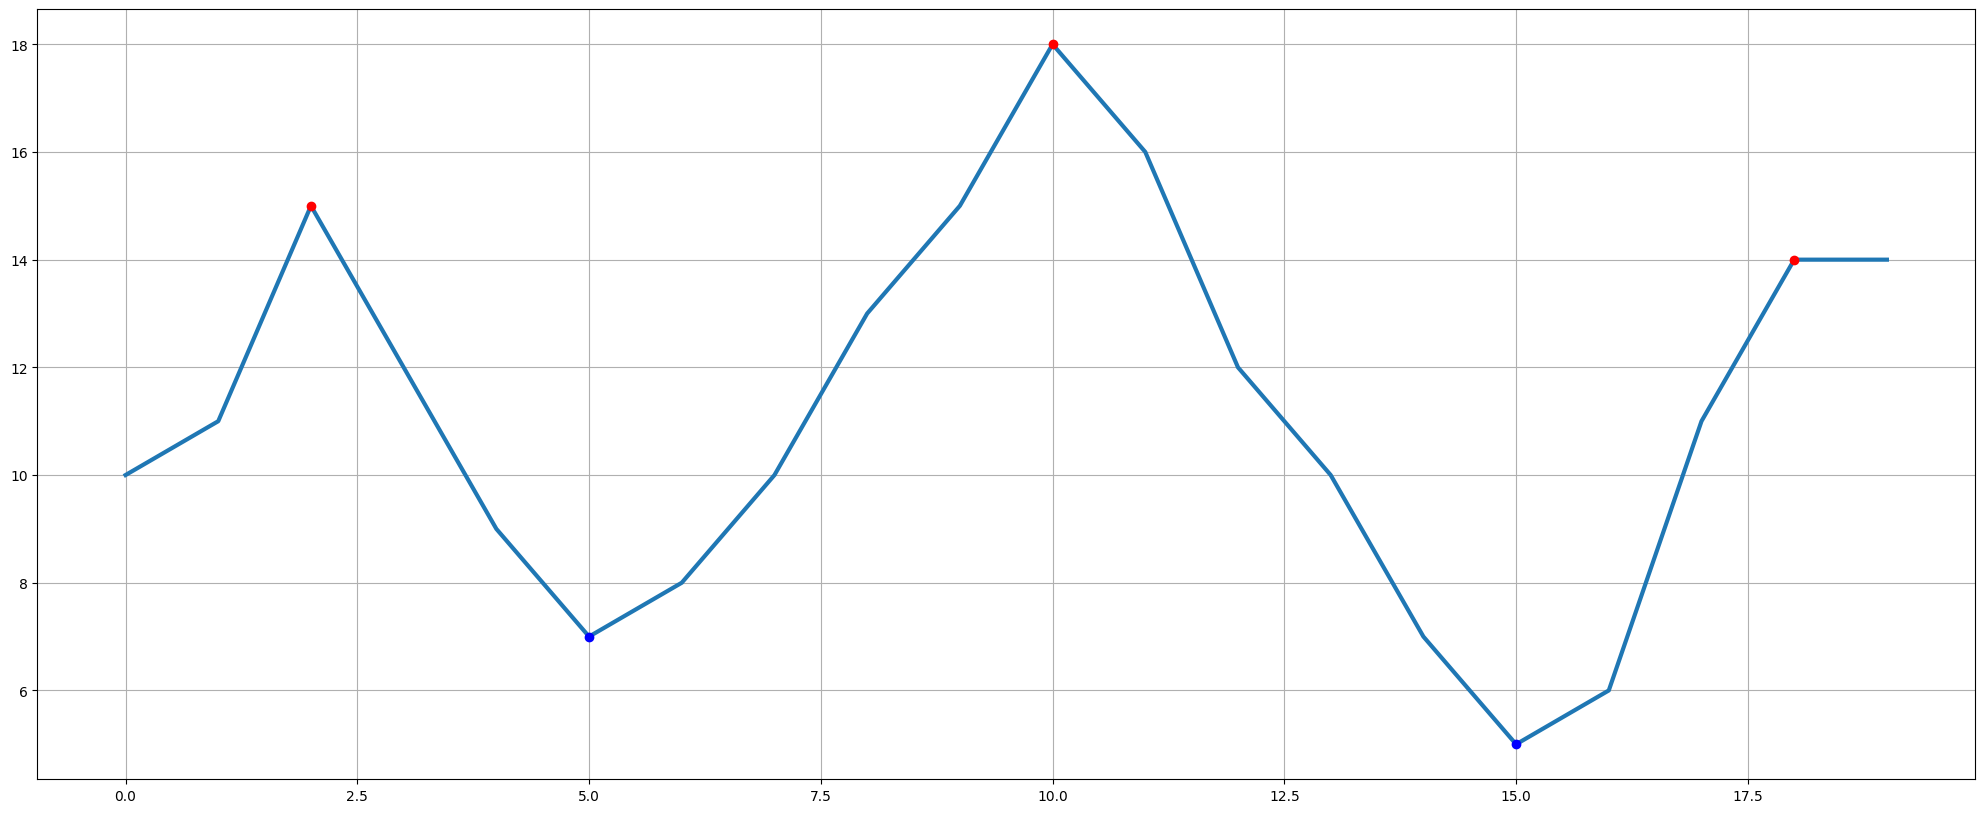

In [1337]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [1338]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [1339]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
2715,16.50,23.111250
2716,17.15,22.975417
2717,18.84,22.762500
2718,20.22,22.558333
2719,21.91,22.337917
...,...,...
2878,21.06,23.429583
2879,20.51,23.388750
2880,20.04,23.355000
2881,19.36,23.335833


<Axes: >

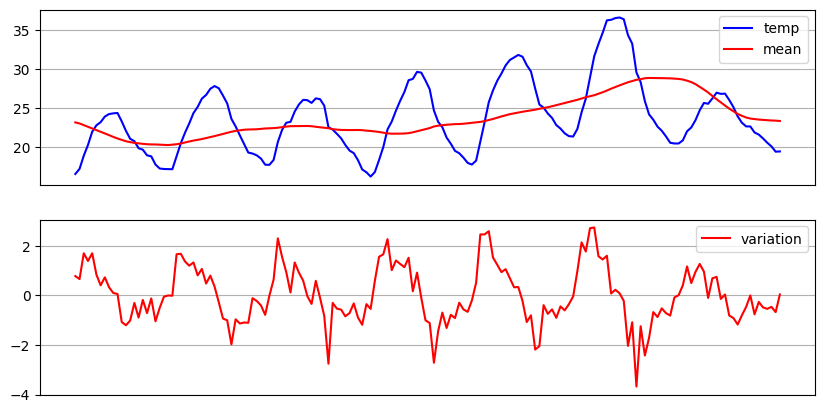

In [1340]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [1341]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(36.56, 16.170000000000016)

In [1342]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [1343]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 26.54 15.83 10.71
J -28 22.99 13.39 9.6
J -27 26.29 15.89 10.4
J -26 29.45 18.22 11.23
J -25 33.07 18.67 14.4
J -24 31.01 19.68 11.33
J -23 25.45 14.37 11.08
J -22 25.09 17.26 7.83
J -21 23.67 14.35 9.32
J -20 25.44 16.28 9.16
J -19 28.33 19.3 9.03
J -18 22.07 16.47 5.6
J -17 18.81 11.37 7.44
J -16 24.91 15.13 9.78
J -15 30.77 19.01 11.76
J -14 35.79 21.12 14.67
J -13 30.73 19.74 10.99
J -12 30.69 19.44 11.25
J -11 28.11 15.53 12.58
J -10 24.38 17.07 7.31
J -9 25.12 14.6 10.52
J -8 29.27 16.33 12.94
J -7 29.64 15.73 13.91
J -6 24.32 16.5 7.82
J -5 27.77 17.67 10.1
J -4 26.19 16.17 10.02
J -3 29.59 17.71 11.88
J -2 31.76 20.66 11.1
J -1 36.56 20.41 16.15
J 0 26.92 19.36 7.56


<Axes: >

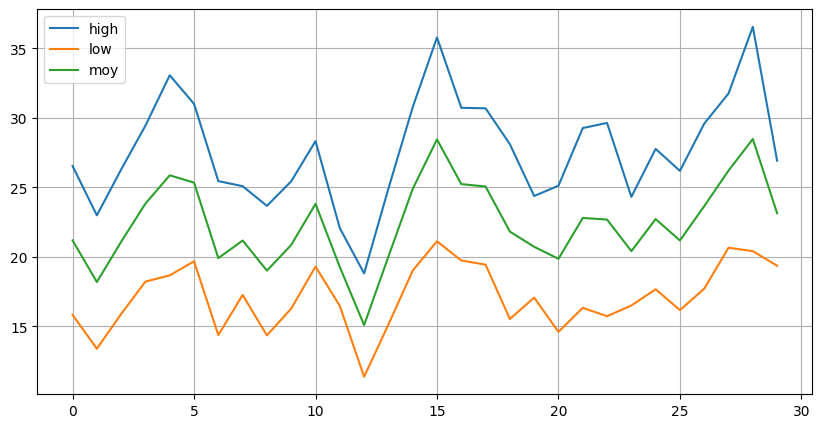

In [1344]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [1345]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[26.54, 33.07, 28.33, 35.79, 29.64, 27.77, 36.56]

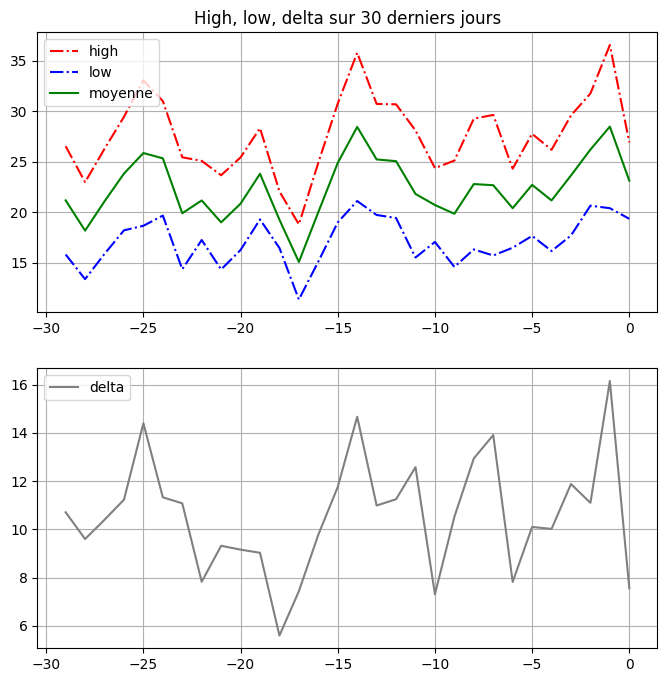

In [1346]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [1347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       2883 non-null   float64
 1   hours      2883 non-null   float64
 2   dates      2883 non-null   object 
 3   variation  2882 non-null   float64
 4   heures     2883 non-null   object 
 5   jours      2883 non-null   object 
dtypes: float64(3), object(3)
memory usage: 135.3+ KB


In [1348]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [1349]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [1350]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

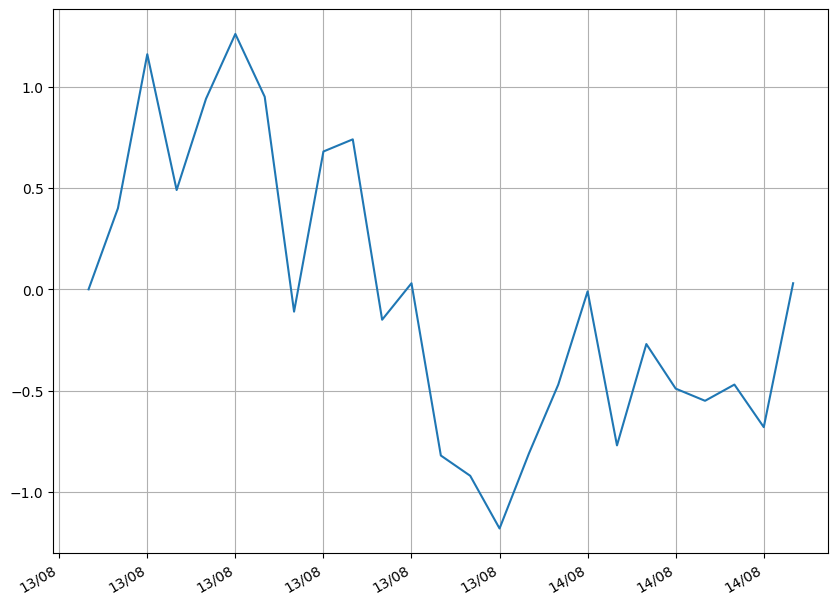

In [1351]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [1352]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 36.56, 14.600000000000025)

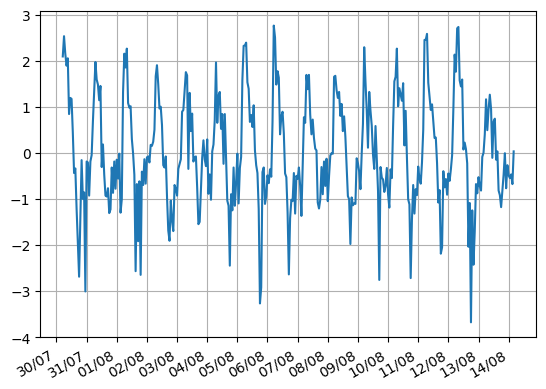

In [1353]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [1354]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(36.56,
 2844    12/08/24 19:00:00
 Name: dates, dtype: object)

In [1355]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(14.600000000000025,
 42      18/04/24 01:00:00
 754     17/05/24 17:00:00
 1962    07/07/24 01:00:00
 2665    05/08/24 08:00:00
 Name: dates, dtype: object)

In [1356]:
data.tail(w)['temp'].describe()

count    360.000000
mean      23.504028
std        4.717694
min       14.600000
25%       19.822500
50%       23.065000
75%       26.687500
max       36.560000
Name: temp, dtype: float64

In [1357]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('14/08/24 08:27:57', 19.39)

In [1358]:
# current date and time
ts = datetime.timestamp(today)
ts

1723616877.031859